In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [141]:
df.size

1036

In [142]:
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
138,Sri Murari Family Restaurant,No,No,2.9/5,0,250,Dining
73,LSD Cafe,No,No,2.9/5,84,700,other
36,Fast And Fresh,Yes,No,2.8/5,91,400,Dining
113,Dharwad Line Bazaar Mishra Pedha,No,No,3.4/5,0,150,Dining
131,Foodlieious Multi Cuisine,No,No,3.4/5,0,100,Dining


In [143]:
df.shape

(148, 7)

In [144]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [147]:
#convert rate intput as flott
def converintpflot(values):
    values = str(values).split('/')
    #print(values)
    values = values[0]
    return float(values)

In [148]:
df['rate'] = df['rate'].apply(converintpflot)

In [149]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## What Types of restaurant do the majority of customers order from 

In [151]:
#Types of Restaurant
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

Text(0.5, 0, 'Types of Restaurant')

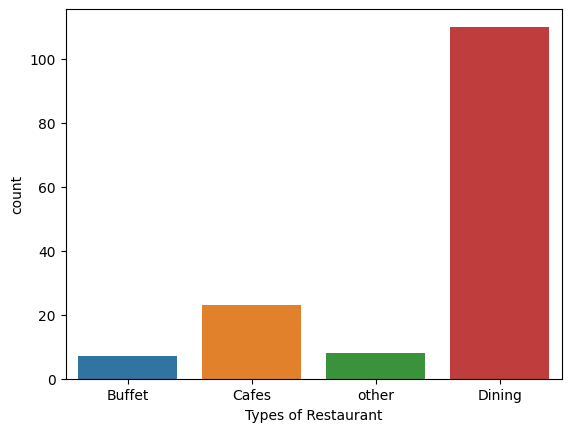

In [156]:
sns.countplot(data=df , x='listed_in(type)', hue=df['listed_in(type)'] )
plt.xlabel("Types of Restaurant")

## 2-How many votes has each type of restaurant received from customers

In [171]:
df['votes'].sum()

np.int64(39192)

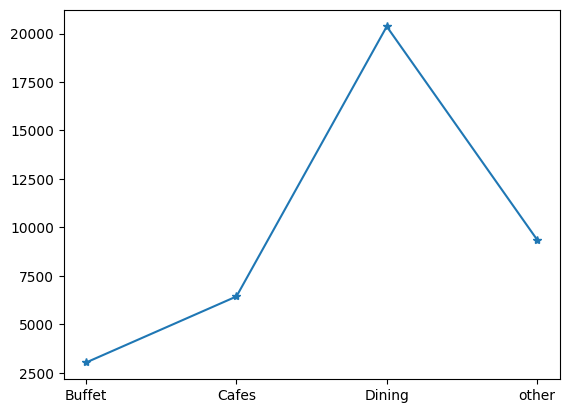

In [175]:
group_data = df.groupby(df['listed_in(type)'])['votes'].sum()
plt.plot(group_data , marker = "*")

## 3- what are the Rating that majority of the restaurant has have recived?

In [176]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


(array([ 1.,  9.,  9., 21., 18., 26., 30., 21.,  9.,  4.]),
 array([2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6]),
 <BarContainer object of 10 artists>)

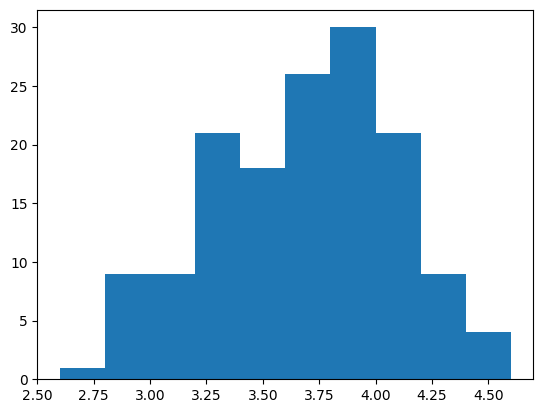

In [184]:
plt.hist(df['rate'] , bins = 10)

## Avg Orderd Spending by coupless 

In [198]:
df['approx_cost(for two people)'].value_counts()

approx_cost(for two people)
300    23
150    16
200    16
400    15
500    14
600    13
800    12
250     6
100     6
450     6
700     5
350     3
550     3
750     3
900     2
650     2
850     2
950     1
Name: count, dtype: int64

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

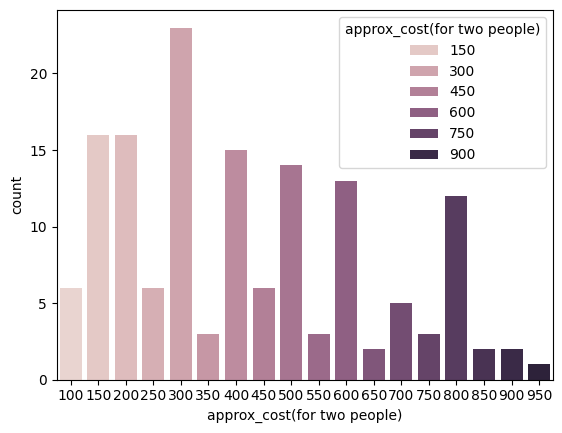

In [199]:
sns.countplot(x = df['approx_cost(for two people)'] , hue=df['approx_cost(for two people)'])

## Which types of restaurant received more offline orders .

In [206]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

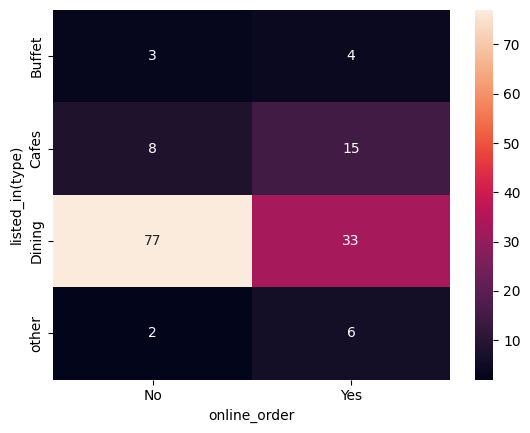

In [211]:
pivot_table = df.pivot_table(index='listed_in(type)' , columns='online_order' , aggfunc='size')
sns.heatmap(pivot_table , annot=True)